<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_10_ProjTen_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load packages

## main packages

import numpy as np
from numpy.random import randn
import pandas as pd

## system level packages

import os
import sys

## visualizing packages

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## sklearn sub modules

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


## check versions and directory

print(sys.executable) # !which python
print(sys.version) # python --version
print(os.getcwd()) # !pwd
# print(os.listdir())
# !ls *xlsx

/Applications/anaconda3/envs/PyML/bin/python
3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
/Users/ariahosseini/Desktop/Notebooks


In [ ]:
import numpy as np
import sys
from sklearn import preprocessing
from numpy.random import rand

print(sys.version)
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)

x = np.array([[10000, 7000, 15000, 40000], [1,5,3,4]])
x = x.T
x_std = preprocessing.scale(x) # x_std = (x - np.mean(x, axis = 0))/np.std(x, axis = 0)

x_train = 5 * rand(10, 2) + 2 * rand(10, 2)
x_test = 8 * rand(10, 2) + 3 * rand(10, 2)

obj_scaler = preprocessing.StandardScaler().fit(x_train)
x_train_std = obj_scaler.transform(x_train)
x_test_std = obj_scaler.transform(x_test)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
numpy:  1.23.5
pandas:  1.5.3


In [ ]:
import numpy as np
import sys
from sklearn import preprocessing
from numpy.random import rand

print(sys.version)
print("numpy: ", np.__version__)

X_train = 5 * rand(10, 3) + 7 * rand(10, 3) + 2
X_test = 3 * rand(10, 3) + 8 * rand(10, 3) + 1
obj_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = obj_scaler.transform(X_train)
X_test = obj_scaler.transform(X_test)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
numpy:  1.23.5


In [ ]:
import numpy as np
import sys
from sklearn import preprocessing
from numpy.random import rand

print(sys.version)
print("numpy: ", np.__version__)

X_train = 3 * rand(10, 4) + 6 * rand(10, 4) + 2
X_test = 2 * rand(10, 4) + 5 * rand(10, 4) - 4
obj_scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_train = obj_scaler.transform(X_train)
X_test = obj_scaler.transform(X_test)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
numpy:  1.23.5


In [ ]:
from scipy import sparse
from sklearn import preprocessing
from numpy.random import rand

X = [[1, 0, 2], [0, 0, 1], [7, 0, 0]]
X_csr = sparse.csr_matrix(X)
X_csc = sparse.csc_matrix(X)

print("X_csr:")
print(X_csr)
print("X_csc:")
print(X_csc)

Z = 2 * rand(2, 3) + 5 * rand(2, 3) - 4
Z_csr = sparse.csr_matrix(Z)
obj_scaler = preprocessing.StandardScaler(with_mean = False).fit(X_csr)
X_train = obj_scaler.transform(X_csr)
X_test = obj_scaler.transform(Z_csr)
print("X_test:")
print(X_test)

X_csr:
  (0, 0)	1
  (0, 2)	2
  (1, 2)	1
  (2, 0)	7
X_csc:
  (0, 0)	1
  (2, 0)	7
  (0, 2)	2
  (1, 2)	1
X_test:
  (0, 0)	-0.34211335081570676
  (0, 1)	-0.366694203223505
  (0, 2)	-0.2092537071579948
  (1, 0)	-0.2972557506404348
  (1, 1)	-0.4618449745084794
  (1, 2)	-0.8823022301866364


In [ ]:
import numpy as np
from sklearn import preprocessing

X = np.array([[1, 2, 3], [2, 5, 7], [7, 999, 990]])
obj_scaler = preprocessing.RobustScaler().fit(X)
X_train = obj_scaler.transform(X)
X_train.round(2)

array([[-0.33, -0.01, -0.01],
       [ 0.  ,  0.  ,  0.  ],
       [ 1.67,  1.99,  1.99]])

In [ ]:
import numpy as np
from sklearn import preprocessing

X = np.array([[1, 2, 3], [2, 5, 7], [7, 9, 10]])
obj_scaler = preprocessing.KernelCenterer().fit(X)
X_train = obj_scaler.transform(X)
X_train.round(2)

array([[ 0.78, -0.22, -0.56],
       [-0.89,  0.11,  0.78],
       [ 0.11,  0.11, -0.22]])

(100, 4) (100, 4) (100, 4) (100, 4)


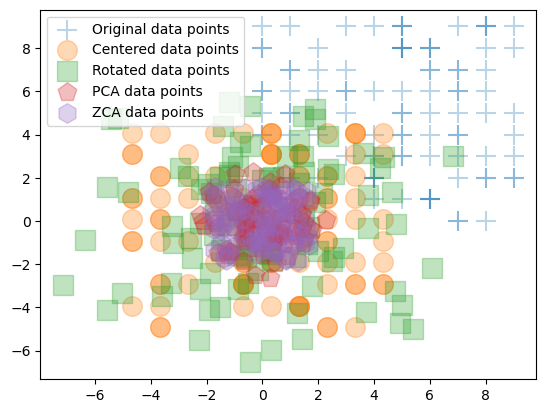

In [ ]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

X = randint(10, size=(100, 4))
Xc = X - np.mean(X, axis = 0)
Xcov = np.cov(Xc, rowvar=False, bias = True)
val, vec = np.linalg.eig(Xcov)
diag_val = np.diag(1/(val**0.5))
Xrot = (vec @ Xc.T).T
Xpca = (diag_val @ vec.T @ Xc.T).T
Xzca = (vec @ diag_val @ vec.T @ Xc.T).T
print(Xc.shape, Xrot.shape, Xpca.shape, Xzca.shape)


plt.scatter(X[:,0], X[:,1], marker = "+", s = 200, alpha = 0.3, label="Original data points")
plt.scatter(Xc[:,0], Xc[:,1], marker = "o", s = 200, alpha = 0.3, label="Centered data points")
plt.scatter(Xrot[:,0], Xrot[:,1], marker = "s", s = 200, alpha = 0.3, label="Rotated data points")
plt.scatter(Xpca[:,0], Xpca[:,1], marker = "p", s = 200, alpha = 0.3, label="PCA data points")
plt.scatter(Xzca[:,0], Xzca[:,1], marker = "h", s = 200, alpha = 0.3, label="ZCA data points")
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x125778610>,
 'caps': [<matplotlib.lines.Line2D at 0x1257a3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x125173c10>,
 'medians': [<matplotlib.lines.Line2D at 0x1257b4650>,
 'fliers': [<matplotlib.lines.Line2D at 0x125774e90>,
 'means': []}

{'whiskers': [<matplotlib.lines.Line2D at 0x1257d1510>,
 'caps': [<matplotlib.lines.Line2D at 0x1257d2890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1257a15d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1257d3950>,
 'fliers': [<matplotlib.lines.Line2D at 0x125778190>,
 'means': []}

Text(0.5, 0, 'Months')

Text(0, 0.5, 'No. of buses')

Text(0.5, 1.0, 'Original data')

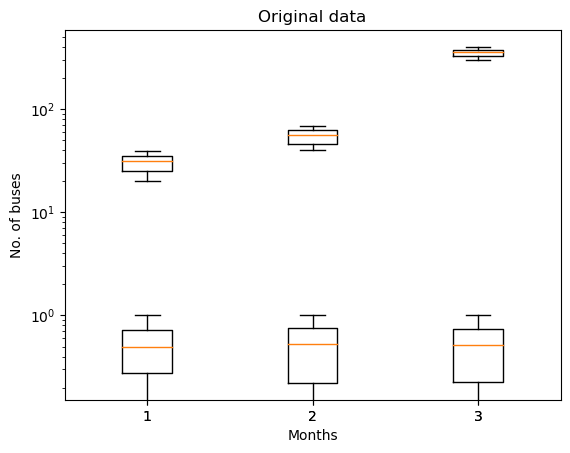

In [ ]:
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import QuantileTransformer

X = np.array([randint(20, 40, size = (100,)), randint(40, 70, size = (100,)), randint(300, 400, size = (100,))]).T
QT = QuantileTransformer(n_quantiles=10, random_state=0).fit_transform(X)

plt.boxplot(X)
plt.boxplot(QT)
plt.xlabel("Months")
plt.ylabel("No. of buses")
plt.title("Original data")
plt.yscale('log')

(array([0.31632748, 0.25881339, 0.17254226, 0.23005635, 0.37384156,
        0.37384156, 0.34508452, 0.2012993 , 0.34508452, 0.25881339]),
 array([-1.77948299, -1.4317421 , -1.0840012 , -0.7362603 , -0.38851941,
        -0.04077851,  0.30696238,  0.65470328,  1.00244418,  1.35018507,
         1.69792597]),
 <BarContainer object of 10 artists>)

(array([0.31635273, 0.25883405, 0.17255603, 0.23007471, 0.37387141,
        0.37387141, 0.34511207, 0.20131537, 0.34511207, 0.25883405]),
 array([-1.78075121, -1.43303807, -1.08532493, -0.7376118 , -0.38989866,
        -0.04218552,  0.30552761,  0.65324075,  1.00095388,  1.34866702,
         1.69638016]),
 <BarContainer object of 10 artists>)

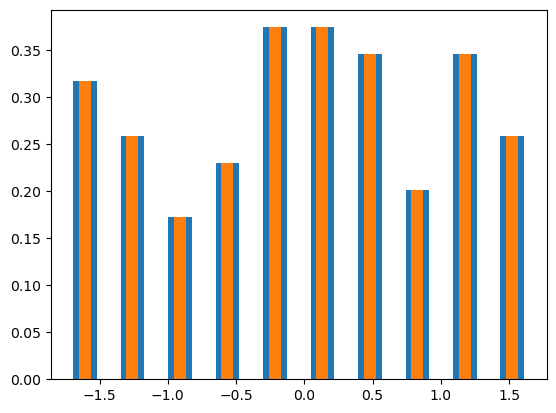

In [ ]:
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import PowerTransformer

X = np.array([randint(20, 40, size = (100,)), randint(40, 70, size = (100,)), randint(300, 400, size = (100,))]).T
PT_yj = PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(X)
PT_bc = PowerTransformer(method='box-cox', standardize=True).fit_transform(X)
plt.hist(PT_yj[:, 0], rwidth = 0.5, density=True, histtype='barstacked', fill=True)
plt.hist(PT_bc[:, 0], rwidth = 0.25, density=True, histtype='barstacked', fill=True)

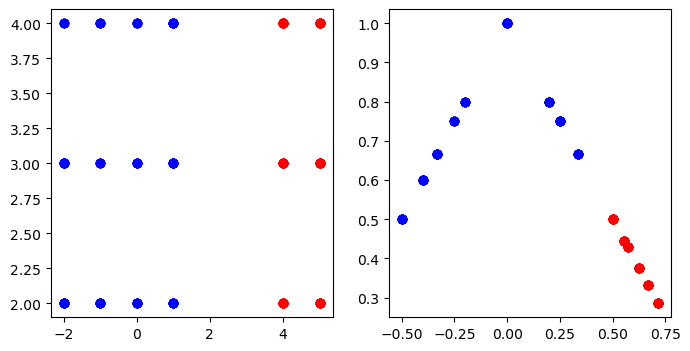

In [ ]:
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import Normalizer

_X_one = np.array([randint(-2, 2, size = (100,)), randint(2, 5, size = (100,))]).T
_X_two = np.array([randint(4, 6, size = (100,)), randint(2, 5, size = (100,))]).T
X_one = Normalizer(norm = "l1").fit_transform(_X_one)
X_two = Normalizer(norm = "l1").fit_transform(_X_two)

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (8,4))
ax[0].scatter(_X_one[:, 0], _X_one[:, 1], c = 'b')
ax[0].scatter(_X_two[:, 0], _X_two[:, 1], c = 'r')
ax[1].scatter(X_one[:, 0], X_one[:, 1], c = 'b')
ax[1].scatter(X_two[:, 0], X_two[:, 1], c = 'r')

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

games = [['first', 'gold', 'top', 3000.00],
         ['second', 'silver', 'middle', 2000.00],
         ['third', 'bronze', 'bottom', 1000.00]]

categorical_features = [[game[0], game[1], game[2]] for game in games]

winners = ['first', 'second', 'third']
medals = ['gold', 'silver', 'bronze']
ranks = ['top', 'middle', 'bottom']

ordinal_encoder = OrdinalEncoder(categories = [winners, medals, ranks])
encoded_features = ordinal_encoder.fit_transform(categorical_features)
encoded_games = [[encoded_features[i][0], encoded_features[i][1], encoded_features[i][2], games[i][3]]
                 for i in range(len(games))]

print("Encoded Games:")
for game in encoded_games:
    print(game)

Encoded Games:
[0.0, 0.0, 0.0, 3000.0]
[1.0, 1.0, 1.0, 2000.0]
[2.0, 2.0, 2.0, 1000.0]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

X = [['football', 'helmet', 'ground', 3000.0],
     ['basketball', 'shoes', 'net', 2000.0],
     ['cricket', 'bat', 'pitch', 1000.0],
     ['tennis', 'band', 'court', 5000.0]]

categorical_columns = [0, 1, 2]
numeric_columns = [3]


categorical_transformer = OneHotEncoder(sparse = False, drop = 'first')
numeric_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

X_encoded = preprocessor.fit_transform(X)

print("Encoded Data:")
print(X_encoded)

Encoded Data:
[[0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 3000.0]
 [0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 2000.0]
 [1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1000.0]
 [0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 5000.0]]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import numpy as np

data = [['first', 'gold', 'top', 3000.0, 'football', 'helmet', 'ground', 300.0],
         ['second', 'silver', 'middle', 2000.0, 'basketball', 'shoes', 'net', 200.0],
         ['third', 'bronze', 'bottom', 1000.0, 'tennis', 'band', 'court', 500.0]]

categorical_columns_ordinal = [0, 1, 2]
categorical_columns_onehot = [4, 5, 6]
numeric_columns = [3, 7]


winners = ['first', 'second', 'third']
medals = ['gold', 'silver', 'bronze']
ranks = ['top', 'middle', 'bottom']

ordinal_encoder = OrdinalEncoder(categories = [winners, medals, ranks])

ordinal_transformer = OrdinalEncoder(categories = [winners, medals, ranks])
onehot_transformer = OneHotEncoder(sparse = False, drop = 'first')


preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, categorical_columns_ordinal),
        ('numeric', 'passthrough', numeric_columns),
        ('onehot', onehot_transformer, categorical_columns_onehot)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_encoded = pipeline.fit_transform(data)

print("Encoded Data:")
print(X_encoded)

Encoded Data:
[[0.0 0.0 0.0 3000.0 300.0 1.0 0.0 1.0 0.0 1.0 0.0]
 [1.0 1.0 1.0 2000.0 200.0 0.0 0.0 0.0 1.0 0.0 1.0]
 [2.0 2.0 2.0 1000.0 500.0 0.0 1.0 0.0 0.0 0.0 0.0]]


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

data = np.array([[2.5, 2], [-5.1, 5], [9.9, 7], [-12.3, 21], [2.7, 15]])
n_bins = 4
encoder = KBinsDiscretizer(n_bins = n_bins, encode = 'ordinal', strategy = 'uniform')
data_binned = encoder.fit_transform(data)
print("Binned Data:")
print(data_binned)
print("Edges:")
print(encoder.bin_edges_)

Binned Data:
[[2. 0.]
 [1. 0.]
 [3. 1.]
 [0. 3.]
 [2. 2.]]
Edges:
[array([-12.3 ,  -6.75,  -1.2 ,   4.35,   9.9 ])
 array([ 2.  ,  6.75, 11.5 , 16.25, 21.  ])]


In [ ]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]]
Xbin = Binarizer(threshold= 1.5).fit_transform(X)
Xbin

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
poly = PolynomialFeatures(2)
poly.fit_transform(X)
poly

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

PolynomialFeatures()

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer


X = np.array([[1,2], [np.nan, 2], [5, np.nan]])

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean', copy = False, add_indicator = True)
imp.fit_transform(X)
X

array([[1., 2., 0., 0.],
       [3., 2., 1., 0.],
       [5., 2., 0., 1.]])

array([[1., 2.],
       [3., 2.],
       [5., 2.]])

In [ ]:
import sys
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


print("Python executable: ", sys.executable)
print("Python version: ", sys.version)
print("Numpy version: ", np.__version__)


X = np.array([[1,2], [3, 4], [5, 6], [np.nan, 8], [9, np.nan]])

ImputeBayesianRidge = IterativeImputer(estimator = BayesianRidge(), missing_values = np.nan, sample_posterior = False, max_iter = 10,
                       tol = 0.001, n_nearest_features = None, initial_strategy = 'mean',
                       imputation_order = 'ascending', skip_complete = False, min_value = -np.inf,
                       max_value = np.inf, verbose = 0, random_state = None, add_indicator = False,
                       keep_empty_features = False)

ImputeDecisionTreeReg = IterativeImputer(estimator = DecisionTreeRegressor(max_features = "sqrt"), missing_values = np.nan, sample_posterior = False, max_iter = 10,
                       tol = 0.001, n_nearest_features = None, initial_strategy = 'mean',
                       imputation_order = 'ascending', skip_complete = False, min_value = -np.inf,
                       max_value = np.inf, verbose = 0, random_state = None, add_indicator = False,
                       keep_empty_features = False)

ImputeExtraTreesReg = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators = 10), missing_values = np.nan, sample_posterior = False, max_iter = 10,
                       tol = 0.001, n_nearest_features = None, initial_strategy = 'mean',
                       imputation_order = 'ascending', skip_complete = False, min_value = -np.inf,
                       max_value = np.inf, verbose = 0, random_state = None, add_indicator = False,
                       keep_empty_features = False)

ImputeKNeighborsReg = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 2), missing_values = np.nan, sample_posterior = False, max_iter = 10,
                       tol = 0.001, n_nearest_features = None, initial_strategy = 'mean',
                       imputation_order = 'ascending', skip_complete = False, min_value = -np.inf,
                       max_value = np.inf, verbose = 0, random_state = None, add_indicator = False,
                       keep_empty_features = False)





X_ImputeBayesianRidge = ImputeBayesianRidge.fit_transform(X)
X_ImputeDecisionTreeReg = ImputeDecisionTreeReg.fit_transform(X)
X_ImputeExtraTreesReg = ImputeExtraTreesReg.fit_transform(X)
X_ImputeKNeighborsReg = ImputeKNeighborsReg.fit_transform(X)


print("Bayesian Ridge: ", X_ImputeBayesianRidge.round(4))
print("Decision Tree Reg: ", X_ImputeDecisionTreeReg.round(4))
print("Extra Trees Reg: ", X_ImputeExtraTreesReg.round(4))
print("K Neighbors Reg: ", X_ImputeKNeighborsReg.round(4))

Python executable:  /Applications/anaconda3/envs/PyML/bin/python
Python version:  3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
Numpy version:  1.23.5
Bayesian Ridge:  [[1.    2.   ]
 [3.    4.   ]
 [5.    6.   ]
 [7.008 8.   ]
 [9.    9.992]]
Decision Tree Reg:  [[1. 2.]
 [3. 4.]
 [5. 6.]
 [9. 8.]
 [9. 8.]]
Extra Trees Reg:  [[1. 2.]
 [3. 4.]
 [5. 6.]
 [9. 8.]
 [9. 8.]]
K Neighbors Reg:  [[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]
 [9. 7.]]
